# Boston Housing Data

## 📌 Sources:
- **Origin:** This dataset was taken from the StatLib library, maintained at Carnegie Mellon University.
- **Creator:** Harrison, D. and Rubinfeld, D.L.  
  *"Hedonic prices and the demand for clean air"*, J. Environ. Economics & Management, vol.5, 81-102, 1978.
- **Date:** July 7, 1993

## 📚 Past Usage:
- Used in *Belsley, Kuh & Welsch*, *Regression diagnostics...*, Wiley, 1980.
  - Various transformations are used in the table on pages 244-261.
- *Quinlan, R.* (1993). *Combining Instance-Based and Model-Based Learning*.  
  In *Proceedings on the Tenth International Conference of Machine Learning*, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

## 🏡 Relevant Information:
The dataset concerns **housing values** in suburbs of **Boston**.

## 📊 Dataset Summary:
- **Number of Instances:** 506  
- **Number of Attributes:** 13 continuous attributes + 1 binary attribute  
- **Missing Values:** None  

## 📑 Attribute Information:

| #  | Feature  | Description |
|----|---------|-------------|
| 1  | **CRIM** | Per capita crime rate by town |
| 2  | **ZN** | Proportion of residential land zoned for lots over 25,000 sq.ft. |
| 3  | **INDUS** | Proportion of non-retail business acres per town |
| 4  | **CHAS** | Charles River dummy variable (1 if tract bounds river, 0 otherwise) |
| 5  | **NOX** | Nitric oxides concentration (parts per 10 million) |
| 6  | **RM** | Average number of rooms per dwelling |
| 7  | **AGE** | Proportion of owner-occupied units built prior to 1940 |
| 8  | **DIS** | Weighted distances to five Boston employment centres |
| 9  | **RAD** | Index of accessibility to radial highways |
| 10 | **TAX** | Full-value property-tax rate per $10,000 |
| 11 | **PTRATIO** | Pupil-teacher ratio by town |
| 12 | **B** | 1000(Bk - 0.63)² where Bk is the proportion of Black residents by town |
| 13 | **LSTAT** | % of lower status population |
| 14 | **MEDV** | Median value of owner-occupied homes (in $1000s) |

---
📌 **Note:** This dataset is widely used in **regression analysis**, particularly in **predicting housing prices** based on various economic and social factors.


In [98]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# from

# from sklearn.datasets import load_boston

import pickle

In [55]:
# Load Dataset and print first 5 rows
df = pd.read_csv('/content/data.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [56]:
df.shape

(506, 14)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [58]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,5
AGE,0
DIS,0
RAD,0
TAX,0


In [59]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<h2>1. This dataset have 506 rows and 14 columns.<h2>
<h2>2. All columns are numericals except one which is booling.<h2>
<h2>3.Their is no missing values in this dataset<h2>

In [60]:
df['CRIM'].mean(),df['CRIM'].median(),df['CRIM'].mode()[0]

(3.613523557312254, 0.25651, 0.01501)

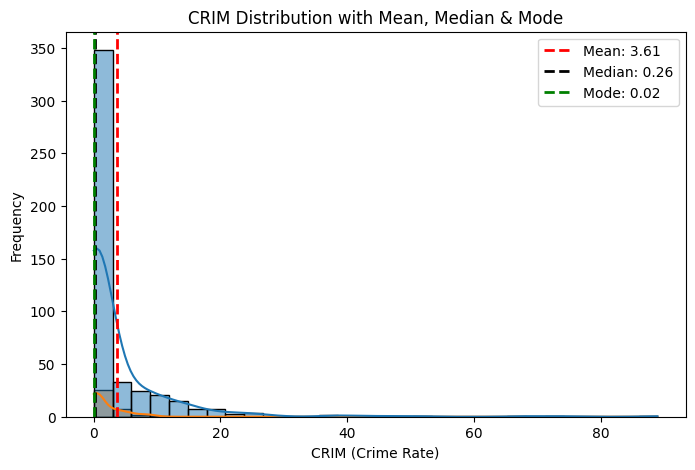

In [61]:
mean_value = df['CRIM'].mean()
median_value = df['CRIM'].median()
mode_value = df['CRIM'].mode()[0]

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='CRIM', kde=True, hue='CHAS', bins=30)

# Plot Mean, Median, Mode as vertical lines
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='black', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='green', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value:.2f}')

# Add labels and title
plt.xlabel("CRIM (Crime Rate)")
plt.ylabel("Frequency")
plt.title("CRIM Distribution with Mean, Median & Mode")
plt.legend()

# Show plot
plt.show()

<Axes: xlabel='CRIM'>

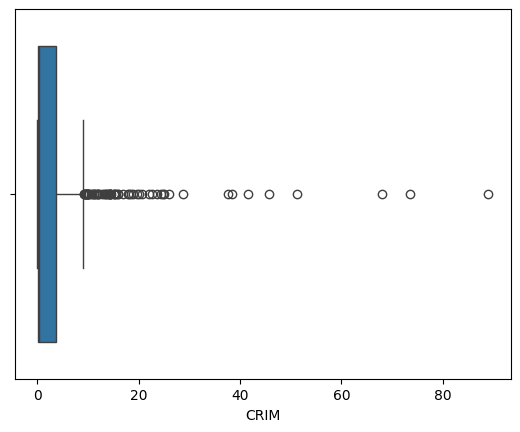

In [62]:
sns.boxplot(data=df,x='CRIM')

<Axes: >

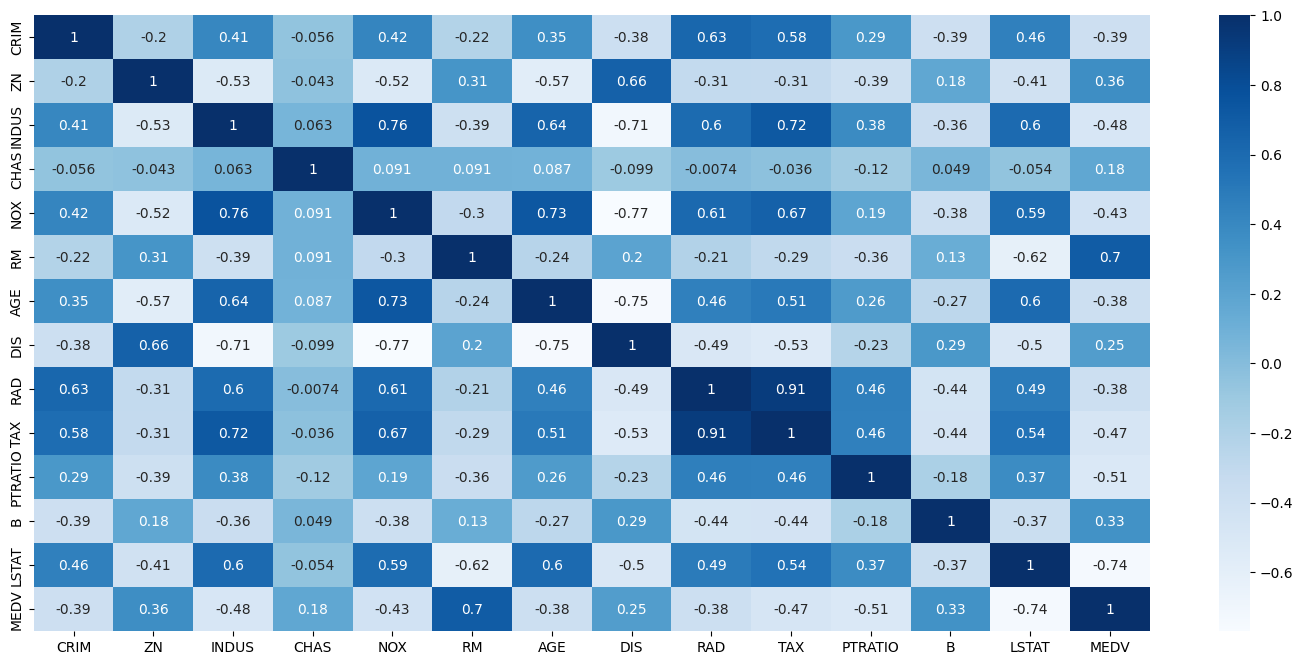

In [63]:
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')


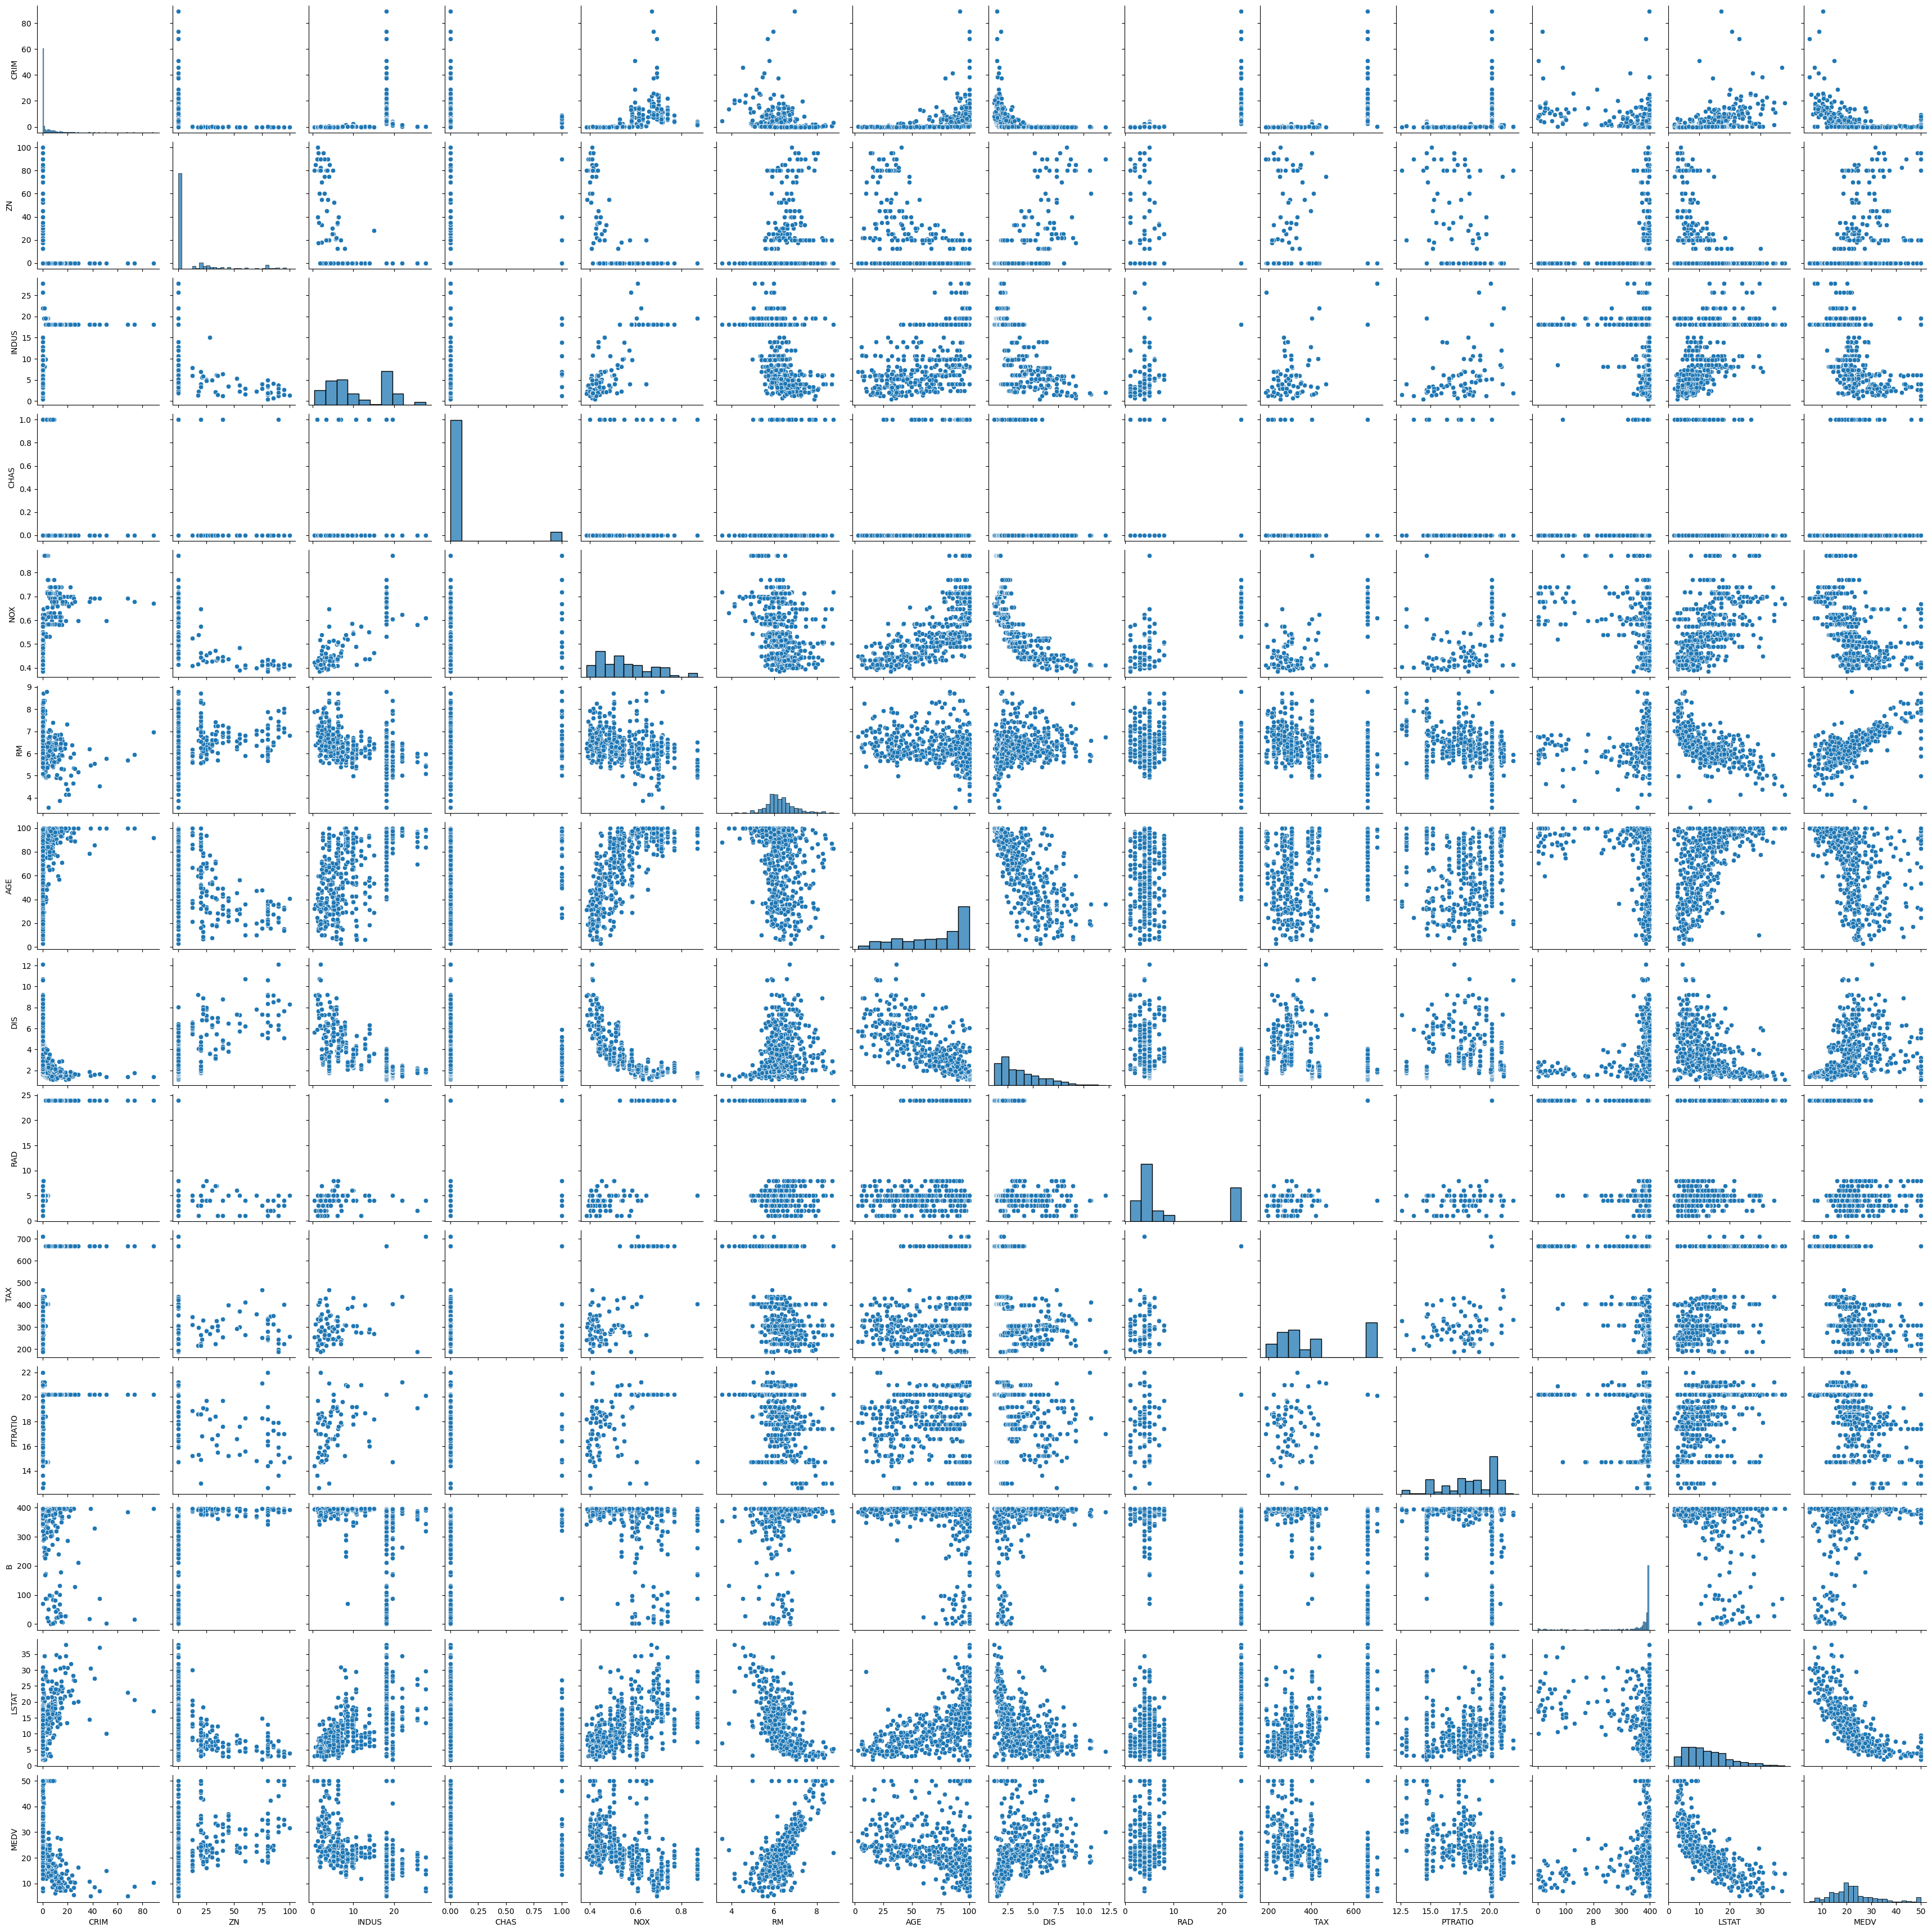

In [64]:
# plot pairplot of all dataset
sns.pairplot(df)
plt.show()

Text(0, 0.5, 'Price')

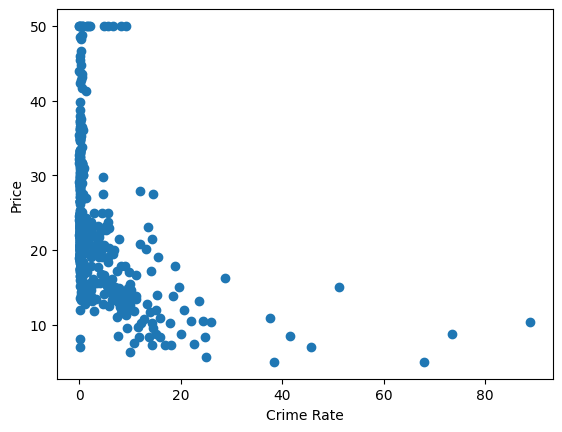

In [65]:
plt.scatter(df['CRIM'],df['MEDV'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

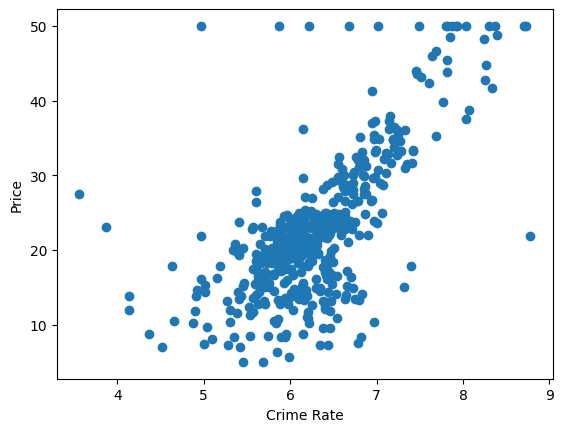

In [66]:
plt.scatter(df['RM'],df['MEDV'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

<Axes: xlabel='RM', ylabel='MEDV'>

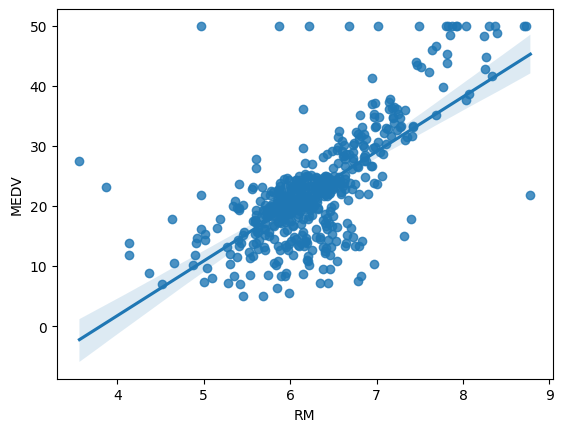

In [67]:
sns.regplot(x="RM",y="MEDV",data=df)

<Axes: xlabel='LSTAT', ylabel='MEDV'>

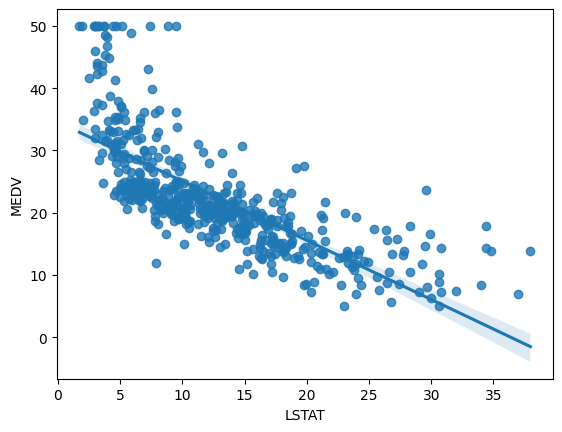

In [68]:
sns.regplot(x="LSTAT",y="MEDV",data=df)

<Axes: xlabel='CHAS', ylabel='MEDV'>

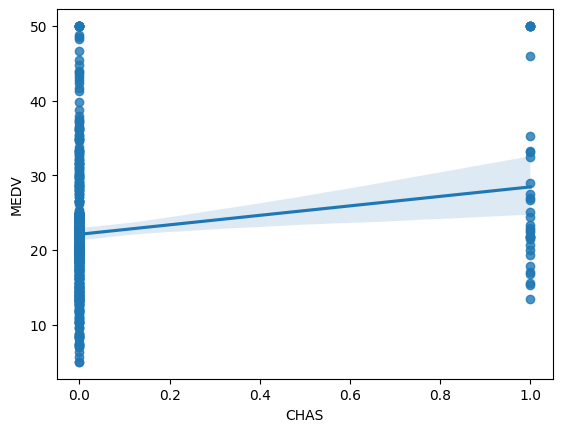

In [69]:
sns.regplot(x="CHAS",y="MEDV",data=df)

<Axes: xlabel='PTRATIO', ylabel='MEDV'>

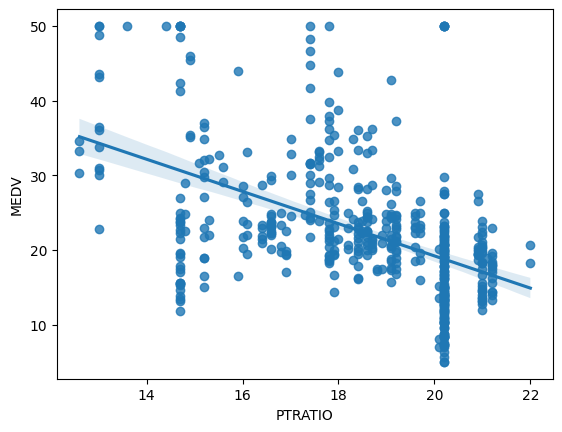

In [70]:
sns.regplot(x="PTRATIO",y="MEDV",data=df)

<h1>Now Build a model<h1>

In [81]:
# Train test split
X = df.drop('MEDV',axis=1)
y = df['MEDV']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

# Check for missing values and replace with the mean
X_train = np.nan_to_num(X_train)  # Replace NaN values with 0
X_test = np.nan_to_num(X_test)    # Replace NaN values with 0

In [82]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [86]:
## print the coefficients and the intercept
print(regression.coef_)

[-1.08175283  0.8385022  -0.07991086  0.75129364 -2.34109611  1.99618439
  0.42060553 -3.32372141  2.67469069 -1.93954833 -2.32721849  1.02275948
 -4.58726885]


In [87]:
print(regression.intercept_)

22.796534653465343


In [88]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [89]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [90]:
reg_pred

array([30.33968901, 36.35801299, 13.89900156, 25.2669767 , 18.22599297,
       23.53680717, 18.03971925, 12.46637935, 23.61373963, 21.18959528,
       25.84374269, 19.43945924, -4.91264505, 21.5316201 , 20.90900829,
       24.58065653, 20.73155036,  6.9429905 , 39.02927636, 17.31888068,
       27.50006633, 30.38741041, 11.60080094, 23.3826588 , 18.38520881,
       17.62747548, 23.51433462, 13.26948879, 23.29554438, 20.08766917,
       25.06148791, 25.3884044 , 23.77726745, 20.29251114, 16.80945689,
       17.92217944, 30.43125239, 21.07596534, 24.0106512 , 24.15203267,
       14.8656299 , 32.78700288, 40.89237232, 18.42363058, 28.03110428,
       17.99839947, 15.0121736 , 25.13753321, 20.29951435, 31.01300551,
       22.56982025, 34.36968538, 15.77554355, 25.69821265, 38.99485198,
       22.24503404, 18.70178784, 32.71581139, 25.2271721 , 13.92225017,
        7.40635036, 29.34933069, 31.80906854, 17.16580168, 20.12699705,
       18.36580723, 19.83178027, 26.46247626, 31.01596   , 11.89

# **Assumptions**

In [103]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, reg_pred)
mse = mean_squared_error(y_test, reg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, reg_pred)

# Print results
print(f"📊 Model Performance:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"🔹 R² Score: {r2:.4f}")


📊 Model Performance:
🔹 Mean Absolute Error (MAE): 3.38
🔹 Mean Squared Error (MSE): 25.11
🔹 Root Mean Squared Error (RMSE): 5.01
🔹 R² Score: 0.6576


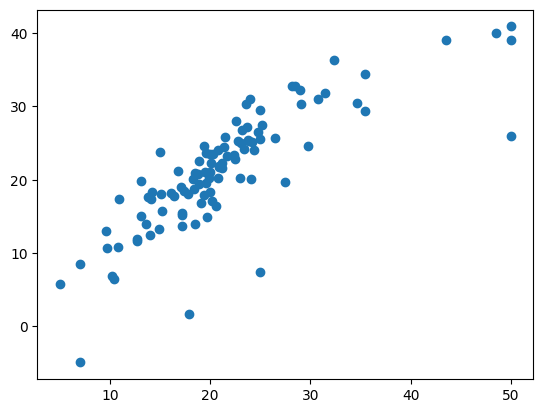

In [91]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [93]:
## Residuals
residuals=y_test-reg_pred
residuals

,MEDV
173,-6.739689
274,-3.958013
491,-0.299002
72,-2.466977
452,-2.125993
...,...
412,16.199894
436,-3.386484
411,2.027016
86,-0.340171


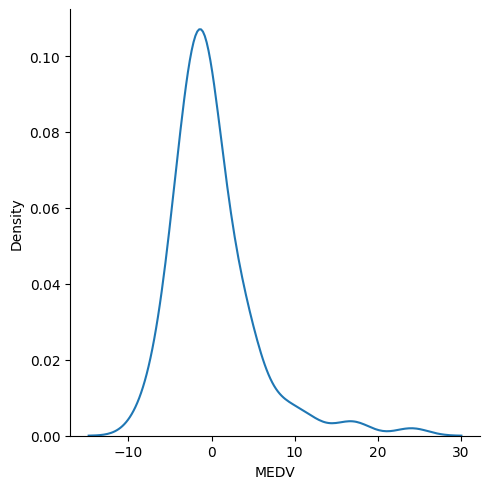

In [100]:
## Plot this residuals

sns.displot(residuals,kind="kde")

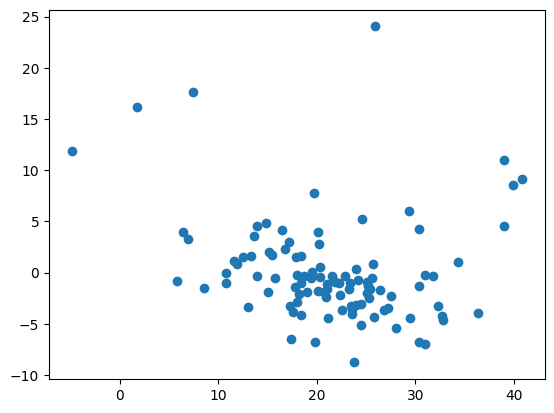

In [101]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

# **New Data Prediction**

In [150]:
##transformation of new data
random_row_number = np.random.randint(1,500)
new_data = df.iloc[random_row_number:random_row_number+1, :-1].values.reshape(1,-1)
scale_data = scaler.transform(new_data)
scale_data

array([[ 1.20989325, -0.50032012,  1.03323679, -0.27808871,  0.48925206,
        -0.02697136,  0.69540015, -0.87240734,  1.70689143,  1.57843444,
         0.84534281,  0.29568869,  0.09190193]])

In [151]:
regression.predict(scale_data)

array([22.1871176])

# **Pickling The Model file For Deployment**

In [152]:
pickle.dump(regression,open('regmodel.pkl','wb'))
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [153]:
## Prediction
random_row_number = np.random.randint(1,500)
new_data = df.iloc[random_row_number:random_row_number+1, :-1].values.reshape(1,-1)
scale_data = scaler.transform(new_data)
scale_data
pickled_model.predict(scale_data)

array([16.30968677])